## IMPORTING THE LIBRARIES

In [ ]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # to plot charts
from collections import Counter
import os

# Modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split

## DOWNLOADING THE DATA

In [ ]:
! pip install -q kaggle


In [ ]:
from google.colab import files

files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abdbazbooz","key":"f1a94901ec01f949651604259d905792"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download  -d  johndasilva/diabetes -p /content/sample_data/ --unzip



  0% 0.00/12.1k [00:00<?, ?B/s]
100% 12.1k/12.1k [00:00<00:00, 5.67MB/s]


# Importing Data*

In [ ]:
df = pd.read_csv("/content/sample_data/diabetes.csv")
df.head(10)



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
5,0,173,78,32,265,46.5,1.159,58,0
6,4,99,72,17,0,25.6,0.294,28,0
7,8,194,80,0,0,26.1,0.551,67,0
8,2,83,65,28,66,36.8,0.629,24,0
9,2,89,90,30,0,33.5,0.292,42,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [ ]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [ ]:
df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T


,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,0.000,1.000,3.000,6.000,9.0000,10.000,13.00000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,85.000,99.000,117.000,141.000,168.0000,181.000,195.00000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,54.000,63.500,72.000,80.000,88.0000,90.000,106.00000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,0.000,23.000,32.000,40.0000,44.050,52.00000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,0.000,40.000,130.000,210.0000,293.000,495.00000,744.00
BMI,2000.0,32.19300,8.149901,0.000,23.700,27.375,32.300,36.800,42.1000,45.010,52.90000,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.164,0.244,0.376,0.624,0.8782,1.136,1.60098,2.42
Age,2000.0,33.09050,11.786423,21.000,22.000,24.000,29.000,40.000,50.0000,58.000,67.00000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,0.000,1.000,1.0000,1.000,1.00000,1.00


In [ ]:
df.Outcome.unique()


array([1, 0])

In [ ]:
df["Outcome"].value_counts()*100/len(df)


0    65.8
1    34.2
Name: Outcome, dtype: float64

# **DATA visualization**

In [ ]:
feature_cols = df.drop('Outcome', axis=1).columns.to_list()
print(feature_cols)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


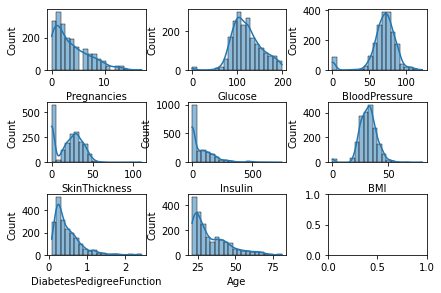

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3)
plt.tight_layout()

for col, ax in zip(feature_cols, axes.flatten()):
    sns.histplot(data=df, x=col, ax=ax, bins=20, kde=True)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f85139fbed0>,
      dtype=object)

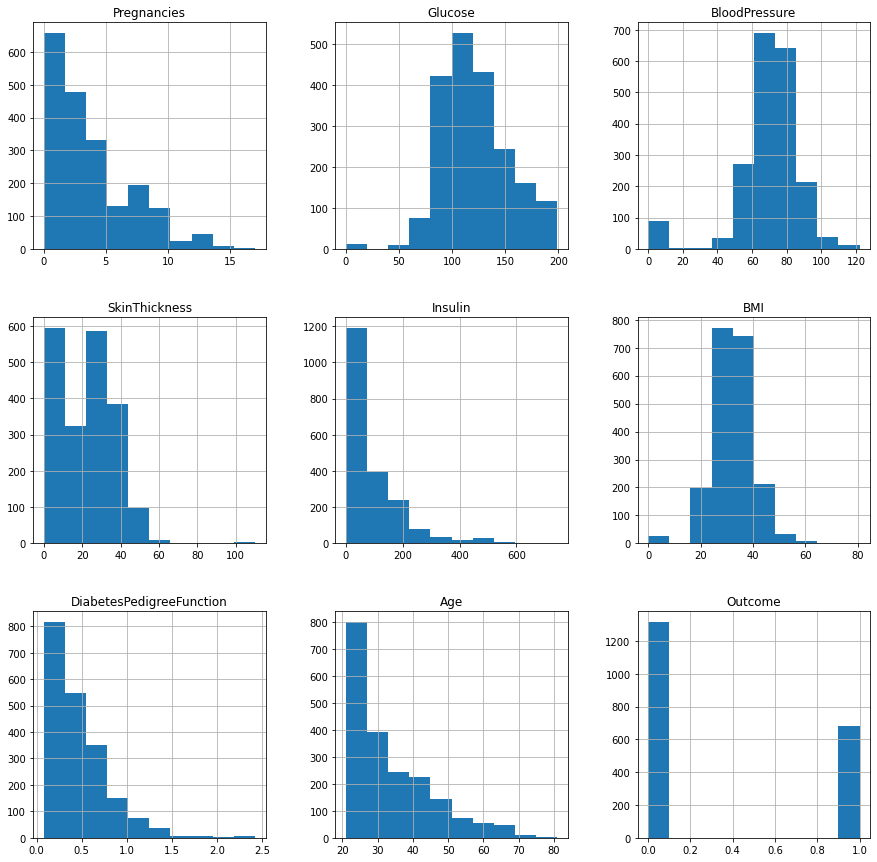

In [ ]:
#The histograms of the all variables
df.hist(figsize = (15,15))

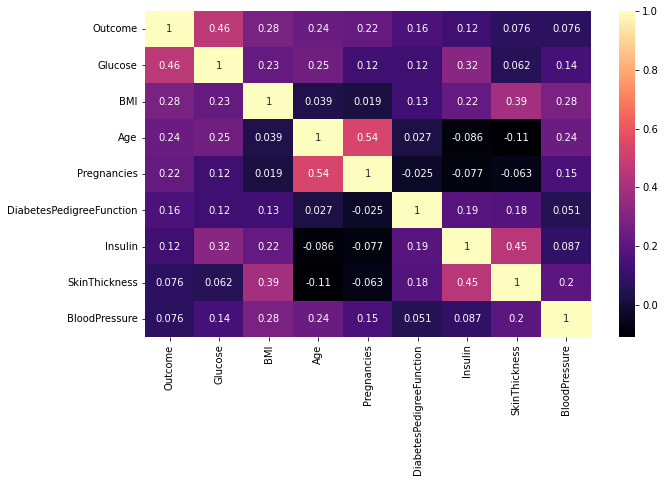

In [ ]:
#Correlation Matrix
k = 9
cols = df.corr().nlargest(k, 'Outcome')['Outcome'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'magma')

# ** DATA PREPROCESSING**

In [1]:
df.isnull().sum()

NameError: name 'df' is not defined

In [ ]:
df.head(5)


In [ ]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [ ]:
df.head(5)

In [2]:
df.isnull().sum()


NameError: name 'df' is not defined

In [ ]:
def median_target(var):
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

In [ ]:
#NaN values according to target variable were filled with median values. And so, we got rid of missing values.
import missingno as msno
msno.bar(df);

OUTLIER ANALYSIS

In [ ]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.25)
    quartile3 = dataframe[variable].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def has_outliers(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    if dataframe[(dataframe[variable] < low_limit) | (dataframe[variable] > up_limit)].any(axis=None):
        print(variable, "yes")
    else:
        print(variable, "no")

def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
        dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [3]:
for col in df.columns:
    has_outliers(df,col)

NameError: name 'df' is not defined

In [ ]:
replace_with_thresholds(df, df.columns)


In [ ]:
for col in df.columns:
    has_outliers(df, col)

In [ ]:
df.head(100)


In [ ]:
df.shape


In [ ]:
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df.Glucose.value_counts()

In [ ]:
df[df['BloodPressure'] == 0]['BloodPressure'].value_counts()
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())

In [ ]:
df[df['BMI'] == 0]['BMI'].value_counts()
df['BMI'] = df['BMI'].replace(0, df['BMI'].median())
# Correct missing values in Insulin and SkinThickness

df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].median())

# *FEATURE ENGINEERING**

FEATURE IMPORTANCE USING RANDOME_FORREST_CLASSIFIER

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.0,138.0,62.0,35.0,167.0,33.6,0.127,47,1.0
1,0.0,84.0,82.0,31.0,125.0,38.2,0.233,23,0.0
2,0.0,145.0,75.0,32.0,167.0,44.2,0.630,31,1.0
3,0.0,135.0,68.0,42.0,250.0,42.3,0.365,24,1.0
4,1.0,139.0,62.0,41.0,260.0,40.7,0.536,21,0.0


In [ ]:
data = pd.DataFrame(df)
data.drop('Outcome',axis=1)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2.0,138.0,62.0,35.0,167.0,33.6,0.127,47
1,0.0,84.0,82.0,31.0,125.0,38.2,0.233,23
2,0.0,145.0,75.0,32.0,167.0,44.2,0.630,31
3,0.0,135.0,68.0,42.0,250.0,42.3,0.365,24
4,1.0,139.0,62.0,41.0,260.0,40.7,0.536,21
...,...,...,...,...,...,...,...,...
1995,2.0,75.0,64.0,24.0,55.0,29.7,0.370,33
1996,8.0,179.0,72.0,42.0,130.0,32.7,0.719,36
1997,6.0,85.0,78.0,27.0,105.0,31.2,0.382,42
1998,0.0,129.0,104.0,42.5,130.0,50.6,0.319,26


In [ ]:
target = df['Outcome']
target.head(3)

0    1.0
1    0.0
2    1.0
Name: Outcome, dtype: float64

In [ ]:
X=[]
Y=[]

In [ ]:
features = list(df.columns.values)
features.remove('Outcome')
print(features)
X = df[features]
Y = df['Outcome']

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2.0,138.0,62.0,35.0,167.0,33.6,0.127,47
1,0.0,84.0,82.0,31.0,125.0,38.2,0.233,23
2,0.0,145.0,75.0,32.0,167.0,44.2,0.630,31
3,0.0,135.0,68.0,42.0,250.0,42.3,0.365,24
4,1.0,139.0,62.0,41.0,260.0,40.7,0.536,21


In [ ]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

# X = pd.DataFrame(data, columns=columns)
# y = target
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=12)

In [ ]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
importance = rf.feature_importances_*1000

print(importance)

[ 61.39989136 320.00085637  76.15451265  48.97562007  54.86558475
 175.92707967 128.39647273 134.27998241]


Text(0.5, 0, 'Random Forest Feature Importance')

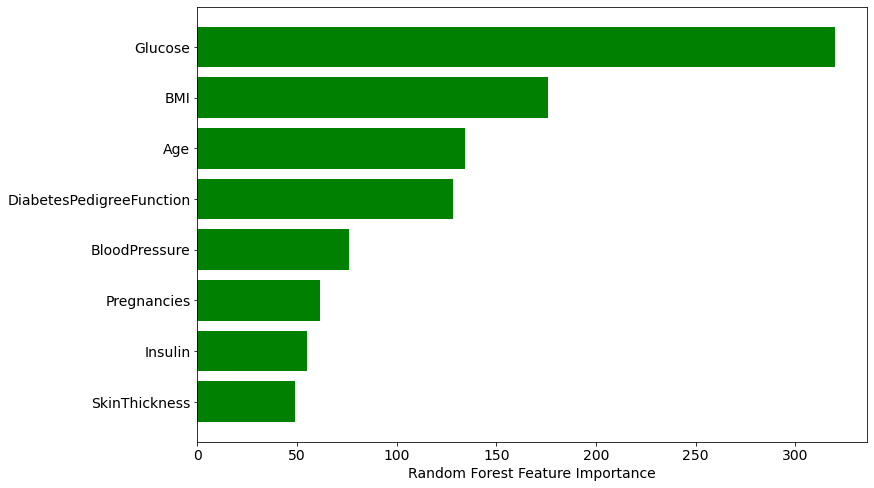

In [ ]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh([features[i] for i in sorted_idx], [importance[i] for i in sorted_idx],color ='green')
plt.xlabel("Random Forest Feature Importance")


PCA FEATURE SELECTION

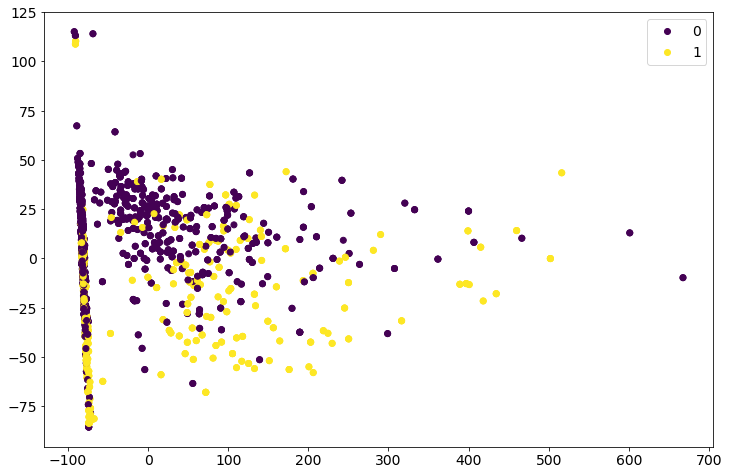

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
Xt = pca.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=Y)
plt.legend(handles=plot.legend_elements()[0], labels=['0','1'],)
plt.show()



1.   List item
2.   List item



# CROSS_VALIDATION WITH K-FOLDS

In [ ]:
from sklearn.model_selection import ShuffleSplit
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

## SVM

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1, random_state=42)
clf1=RandomForestClassifier(max_depth = 8,
                                  max_features = 5,
                                  min_samples_split = 2,
                                  n_estimators = 500)
clf2=KNeighborsClassifier(2)
clf3=LogisticRegression(solver = "liblinear")
clf4=DecisionTreeClassifier(criterion = "entropy", max_depth = 12)
clf5=GaussianNB()
clf6=MultinomialNB()
clf7=BernoulliNB()

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score)}

In [ ]:
Acc_Cross_Val2= cross_val_score(clf, X, Y, cv=cv,scoring=scoring['accuracy'])
print("cross_val_score_svm",Acc_Cross_Val2.mean())
Recall_Cross_Val2  =cross_val_score(clf, X, Y, cv=cv,scoring=scoring['recall'])
print('recall_val_svm',Recall_Cross_Val2.mean())
precision_Cross_Val2=cross_val_score(clf, X, Y, cv=cv,scoring=scoring['precision'])
print('precision_val_svm',precision_Cross_Val2.mean())

cross_val_score_svm 0.8123333333333335
recall_val_svm 0.7068357805078211
precision_val_svm 0.730239366352688


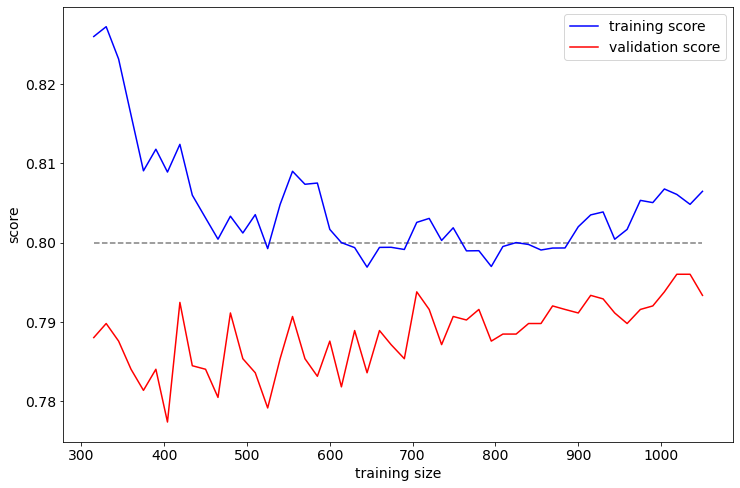

In [ ]:
from sklearn.model_selection import learning_curve

from sklearn.model_selection import learning_curve

N, train_lc, val_lc = learning_curve(clf,X_train, y_train, cv=cv,train_sizes=np.linspace(0.3, 1, 50))

plt.plot(N, np.mean(train_lc, 1), color='blue', label='training score')
plt.plot(N, np.mean(val_lc, 1), color='red', label='validation score')
plt.hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')


plt.xlabel('training example')
plt.ylabel('score')
#plt.title('degree = {0}'.format(degree), size=14)
plt.legend(loc='best')

### Random forest

In [ ]:
Acc_Cross_Val2= cross_val_score(clf1, X, Y, cv=cv,scoring=scoring['accuracy'])
print(Acc_Cross_Val2.mean())
Recall_Cross_Val2  =cross_val_score(clf1, X, Y, cv=cv,scoring=scoring['recall'])
print(Recall_Cross_Val2.mean())
precision_Cross_Val2=cross_val_score(clf1, X, Y, cv=cv,scoring=scoring['precision'])
print(precision_Cross_Val2.mean())

0.974
0.9519852316139883
0.9679014731778551


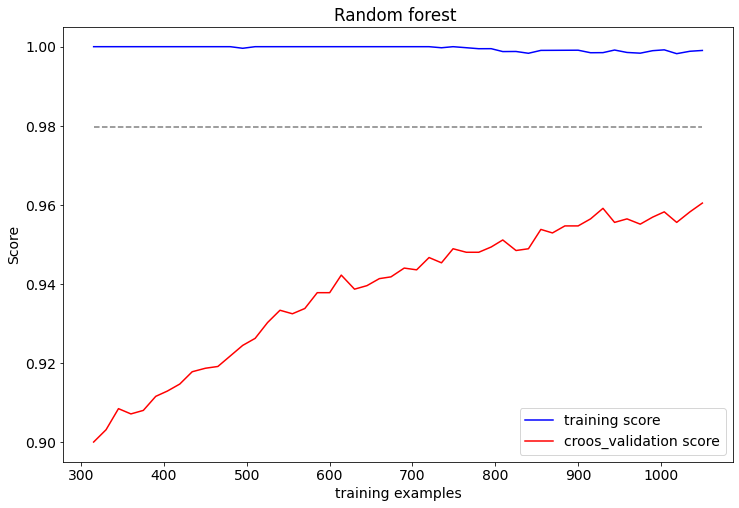

In [ ]:
from sklearn.model_selection import learning_curve

from sklearn.model_selection import learning_curve

N, train_lc, val_lc = learning_curve(clf1,X_train, y_train, cv=cv,train_sizes=np.linspace(0.3, 1, 50))

plt.plot(N, np.mean(train_lc, 1), color='blue', label='training score')
plt.plot(N, np.mean(val_lc, 1), color='red', label='croos_validation score')
plt.hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

plt.title('Random forest ')
plt.xlabel('training examples')
plt.ylabel('Score')
#plt.title('degree = {0}'.format(degree), size=14)
plt.legend(loc='best')

### KNN

In [ ]:
Acc_Cross_Val3= cross_val_score(clf2, X, Y, cv=cv,scoring=scoring['accuracy'])
print(Acc_Cross_Val3.mean())
Recall_Cross_Val3=cross_val_score(clf2, X, Y, cv=cv,scoring=scoring['recall'])
print(Recall_Cross_Val3.mean())
precision_Cross_Val3=cross_val_score(clf2, X, Y, cv=cv,scoring=scoring['precision'])
print(precision_Cross_Val3.mean())

0.9413333333333334
0.8591235928309336
0.9634714159367922


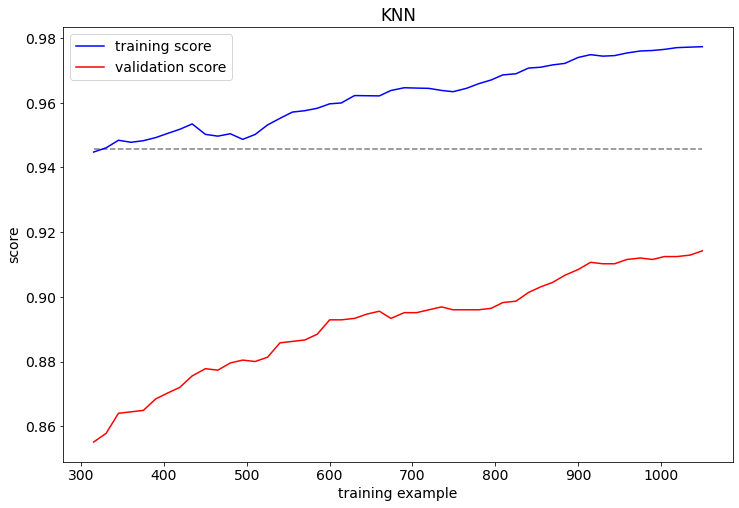

In [ ]:
from sklearn.model_selection import learning_curve

from sklearn.model_selection import learning_curve

N, train_lc, val_lc = learning_curve(clf2,X_train, y_train, cv=cv,train_sizes=np.linspace(0.3, 1, 50))

plt.plot(N, np.mean(train_lc, 1), color='blue', label='training score')
plt.plot(N, np.mean(val_lc, 1), color='red', label='validation score')
plt.hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

plt.title('KNN')
plt.xlabel('training example')
plt.ylabel('score')
#plt.title('degree = {0}'.format(degree), size=14)
plt.legend(loc='best')

## LOGISTIC

In [ ]:
#Logistc

In [ ]:
Acc_Cross_Val4= cross_val_score(clf3, X, Y, cv=cv,scoring=scoring['accuracy'])
print(Acc_Cross_Val4.mean())
Recall_Cross_Val4=cross_val_score(clf3, X, Y, cv=cv,scoring=scoring['recall'])
print(Recall_Cross_Val4.mean())
precision_Cross_Val4=cross_val_score(clf3, X, Y, cv=cv,scoring=scoring['precision'])
print(precision_Cross_Val4.mean())

0.804
0.634982230061537
0.7472524205048423


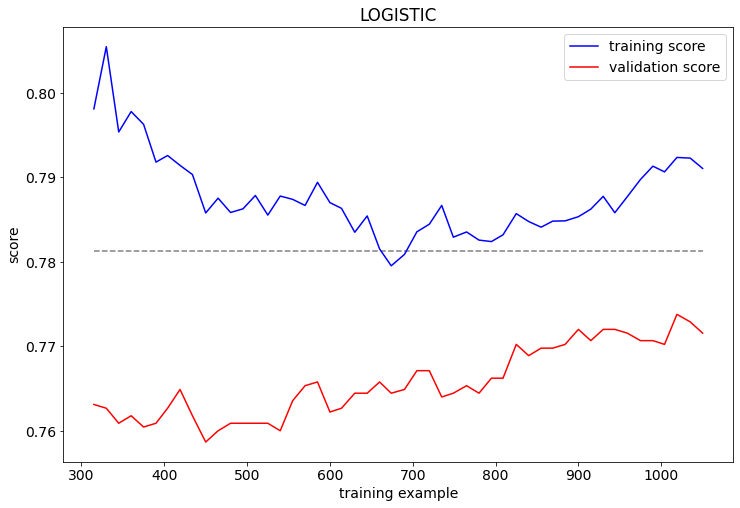

In [ ]:
from sklearn.model_selection import learning_curve

from sklearn.model_selection import learning_curve

N, train_lc, val_lc = learning_curve(clf3,X_train, y_train, cv=cv,train_sizes=np.linspace(0.3, 1, 50))

plt.plot(N, np.mean(train_lc, 1), color='blue', label='training score')
plt.plot(N, np.mean(val_lc, 1), color='red', label='validation score')
plt.hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

plt.title('LOGISTIC')
plt.xlabel('training example')
plt.ylabel('score')
#plt.title('degree = {0}'.format(degree), size=14)
plt.legend(loc='best')

### DecisionTree



In [ ]:
Acc_Cross_Val5= cross_val_score(clf4, X, Y, cv=cv,scoring=scoring['accuracy'])
print(Acc_Cross_Val5.mean())
Recall_Cross_Val5=cross_val_score(clf4, X, Y, cv=cv,scoring=scoring['recall'])
print(Recall_Cross_Val5.mean())
precision_Cross_Val5=cross_val_score(clf4, X, Y, cv=cv,scoring=scoring['precision'])
print(precision_Cross_Val5.mean())

0.975
0.9684569120741072
0.9573619114639108


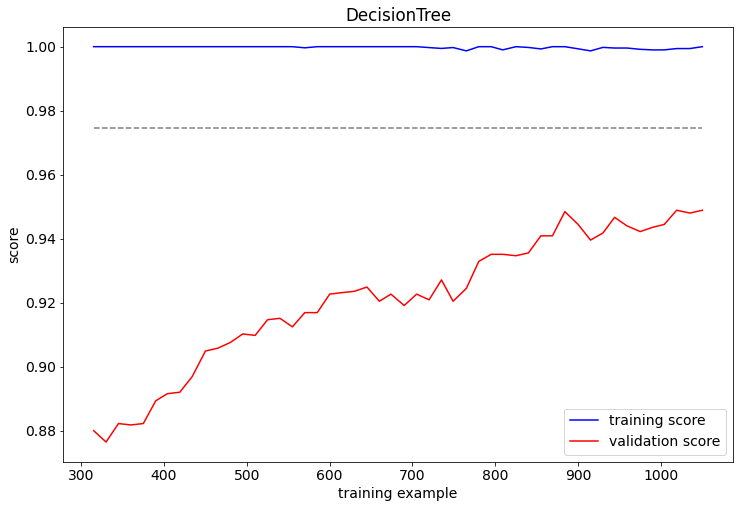

In [ ]:
from sklearn.model_selection import learning_curve

from sklearn.model_selection import learning_curve

N, train_lc, val_lc = learning_curve(clf4,X_train, y_train, cv=cv,train_sizes=np.linspace(0.3, 1, 50))

plt.plot(N, np.mean(train_lc, 1), color='blue', label='training score')
plt.plot(N, np.mean(val_lc, 1), color='red', label='validation score')
plt.hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

plt.title('DecisionTree')
plt.xlabel('training example')
plt.ylabel('score')
#plt.title('degree = {0}'.format(degree), size=14)
plt.legend(loc='best')

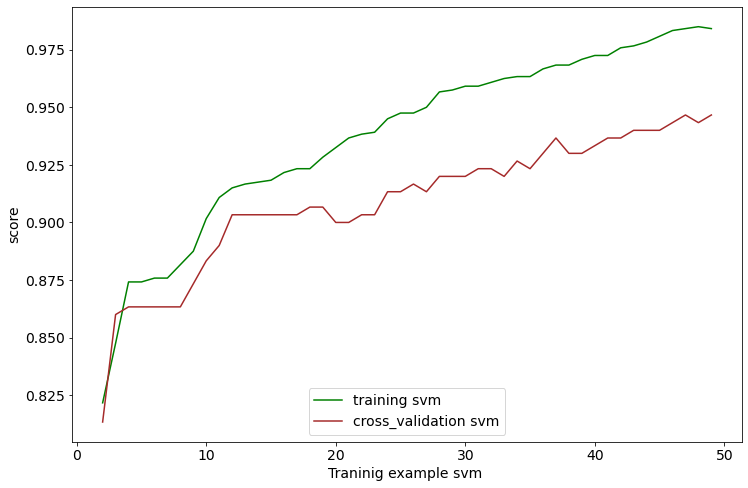

In [ ]:
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeClassifier

degree = np.arange(50)

train_score4, val_score4 = validation_curve(clf4, X_train, y_train,
                                            param_name= 'max_leaf_nodes',
                                            param_range = degree,
                                            cv=5)

plt.plot(degree, np.median(train_score4, 1), color='green', label='training svm')
plt.plot(degree, np.median(val_score4, 1), color='brown', label='cross_validation svm')
plt.legend(loc='lower center')
plt.xlabel('Traninig example svm ')

plt.ylabel('score');

### GaussianNB

In [ ]:
Acc_Cross_Val6= cross_val_score(clf5, X, Y, cv=cv,scoring=scoring['accuracy'])
print(Acc_Cross_Val6.mean())
Recall_Cross_Val6=cross_val_score(clf5, X, Y, cv=cv,scoring=scoring['recall'])
print(Recall_Cross_Val6.mean())
precision_Cross_Val6=cross_val_score(clf5, X, Y, cv=cv,scoring=scoring['precision'])
print(precision_Cross_Val6.mean())

0.8076666666666668
0.7208529940204089
0.713007143971647


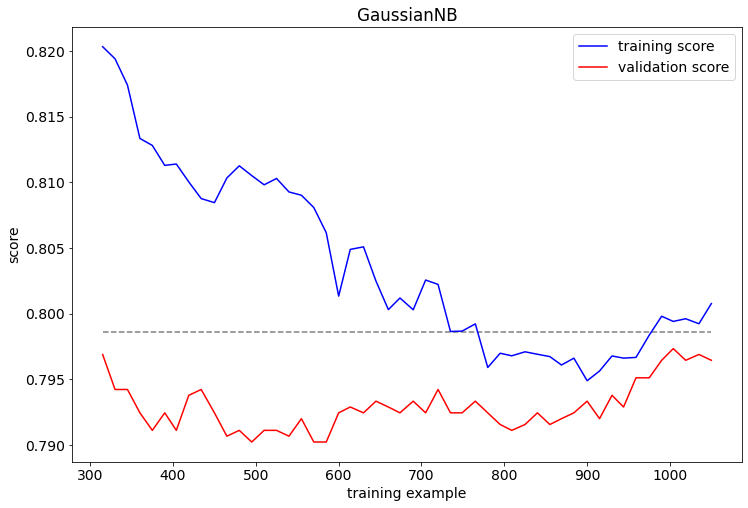

In [ ]:
from sklearn.model_selection import learning_curve

from sklearn.model_selection import learning_curve

N, train_lc, val_lc = learning_curve(clf5,X_train, y_train, cv=cv,train_sizes=np.linspace(0.3, 1, 50))

plt.plot(N, np.mean(train_lc, 1), color='blue', label='training score')
plt.plot(N, np.mean(val_lc, 1), color='red', label='validation score')
plt.hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

plt.title('GaussianNB')
plt.xlabel('training example')
plt.ylabel('score')
#plt.title('degree = {0}'.format(degree), size=14)
plt.legend(loc='best')

### MultinomialNB

In [ ]:
Acc_Cross_Val7= cross_val_score(clf6, X, Y, cv=cv,scoring=scoring['accuracy'])
print(Acc_Cross_Val7.mean())
Recall_Cross_Val7=cross_val_score(clf6, X, Y, cv=cv,scoring=scoring['recall'])
print(Recall_Cross_Val7.mean())
precision_Cross_Val7=cross_val_score(clf6, X, Y, cv=cv,scoring=scoring['precision'])
print(precision_Cross_Val7.mean())

0.7746666666666666
0.732823858931015
0.6477905743494667


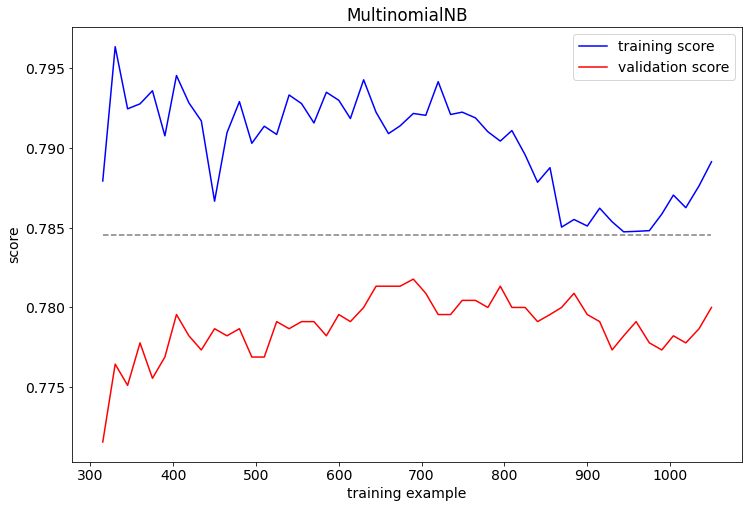

In [ ]:
from sklearn.model_selection import learning_curve

from sklearn.model_selection import learning_curve

N, train_lc, val_lc = learning_curve(clf6,X_train, y_train, cv=cv,train_sizes=np.linspace(0.3, 1, 50))

plt.plot(N, np.mean(train_lc, 1), color='blue', label='training score')
plt.plot(N, np.mean(val_lc, 1), color='red', label='validation score')
plt.hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

plt.title('MultinomialNB')
plt.xlabel('training example')
plt.ylabel('score')
#plt.title('degree = {0}'.format(degree), size=14)
plt.legend(loc='best')

## BernoulliNB

In [ ]:
Acc_Cross_Val8= cross_val_score(clf7, X, Y, cv=cv,scoring=scoring['accuracy'])
print(Acc_Cross_Val8.mean())
Recall_Cross_Val8=cross_val_score(clf7, X, Y, cv=cv,scoring=scoring['recall'])
print(Recall_Cross_Val8.mean())
precision_Cross_Val8=cross_val_score(clf7, X, Y, cv=cv,scoring=scoring['precision'])
print(precision_Cross_Val8.mean())

0.662
0.0
0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

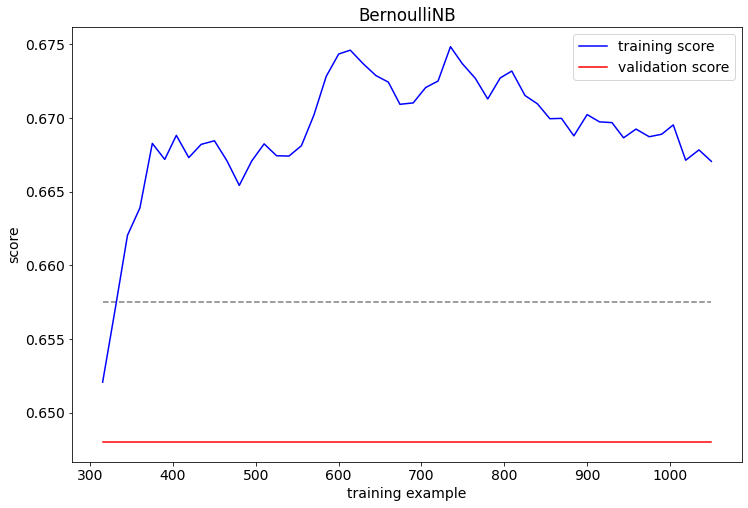

In [ ]:
from sklearn.model_selection import learning_curve

from sklearn.model_selection import learning_curve

N, train_lc, val_lc = learning_curve(clf7,X_train, y_train, cv=cv,train_sizes=np.linspace(0.3, 1, 50))

plt.plot(N, np.mean(train_lc, 1), color='blue', label='training score')
plt.plot(N, np.mean(val_lc, 1), color='red', label='validation score')
plt.hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

plt.title('BernoulliNB')
plt.xlabel('training example')
plt.ylabel('score')
#plt.title('degree = {0}'.format(degree), size=14)
plt.legend(loc='best')

# MODELING

## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier().fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.978

In [ ]:
rf_params = {"max_depth": [2,5,8],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model,
                           rf_params,
                           cv = 10,
                           n_jobs = -1,
                           verbose = 2)

rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [ ]:
print("Best Params: " + str(rf_cv_model.best_params_))


Best Params: {'max_depth': 8, 'max_features': 5, 'min_samples_split': 2, 'n_estimators': 500}


In [ ]:
rf_tuned = RandomForestClassifier(max_depth = 8,
                                  max_features = 5,
                                  min_samples_split = 2,
                                  n_estimators = 500)

In [ ]:
rf_tuned.fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.978

In [ ]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred)))

Accuracy: 0.98
Precision: 0.97
Recall: 0.97
F1: 0.97


**ploting** THE CONFUSION_MATRIX FOR RANDOMFORREST

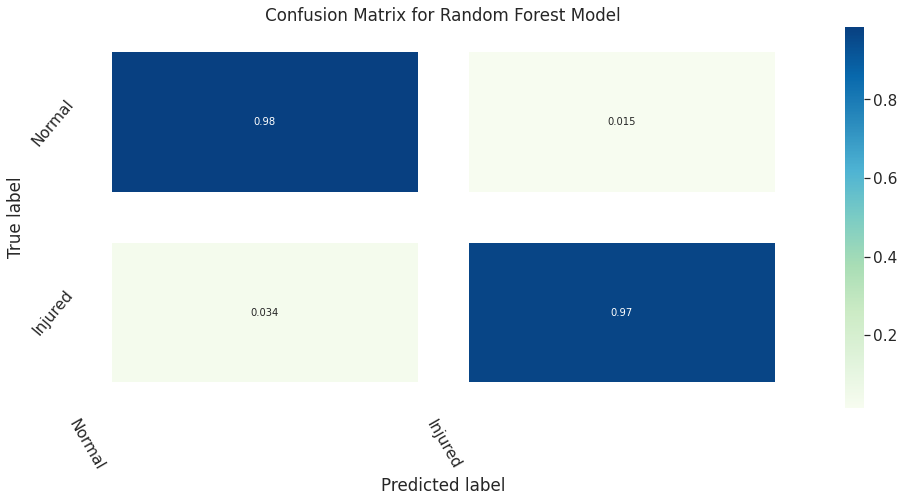

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.GnBu
            , linewidths=50)

# Add labels to the plot
class_names = ['Normal', 'Injured']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=300)
plt.yticks(tick_marks2, class_names, rotation=50)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

## SVM

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)


0.872

In [ ]:
svm_predicted = svm.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, svm_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, svm_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, svm_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, svm_predicted)))

Accuracy: 0.87
Precision: 0.79
Recall: 0.87
F1: 0.83


THE CONFUSION MATRIX FOR SVM

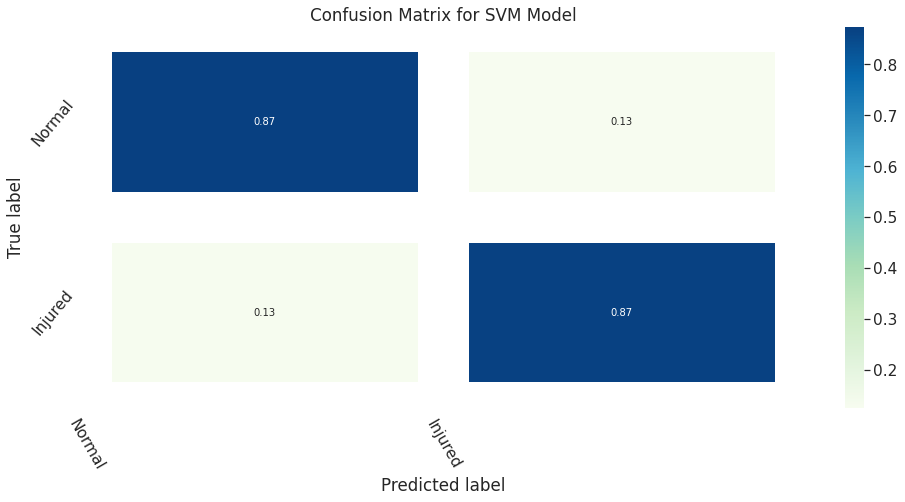

In [ ]:
matrix = confusion_matrix(y_test, svm_predicted)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.GnBu
            , linewidths=50)

# Add labels to the plot
class_names = ['Normal', 'Injured']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=300)
plt.yticks(tick_marks2, class_names, rotation=50)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for SVM Model')
plt.show()

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.914

In [ ]:
knn_params = {"n_neighbors": np.arange(1,20)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [ ]:
print("Best KNN score:" + str(knn_cv.best_score_))
print("Best KNN parameter: " + str(knn_cv.best_params_))

Best KNN score:0.9813333333333333
Best KNN parameter: {'n_neighbors': 1}


In [ ]:
knn = KNeighborsClassifier(2)
knn_tuned = knn.fit(X_train, y_train)

In [ ]:
y_pred = knn_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.966

In [ ]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred)))

Accuracy: 0.97
Precision: 0.99
Recall: 0.91
F1: 0.95


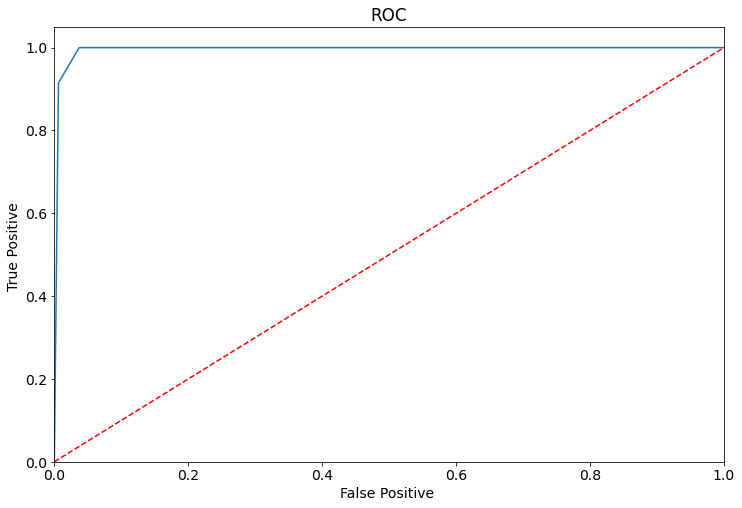

In [ ]:
logit_roc_auc = roc_auc_score(y_test, y_pred)

fpr, tpr, thresholds = roc_curve(y_test, knn_tuned.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive ')
plt.ylabel('True Positive ')
plt.title('ROC')
plt.show()


## **logistic** regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(solver = "liblinear")
log_model = log.fit(X_train,y_train)
log_model

LogisticRegression(solver='liblinear')

In [ ]:
y_pred = log_model.predict(X_test)


In [ ]:
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.86       324
         1.0       0.75      0.66      0.71       176

    accuracy                           0.81       500
   macro avg       0.79      0.77      0.78       500
weighted avg       0.80      0.81      0.80       500



In [ ]:
accuracy_score(y_test, log_model.predict(X_test))
cross_val_score(log_model, X_test, y_test, cv = 10).mean()

0.7980000000000002

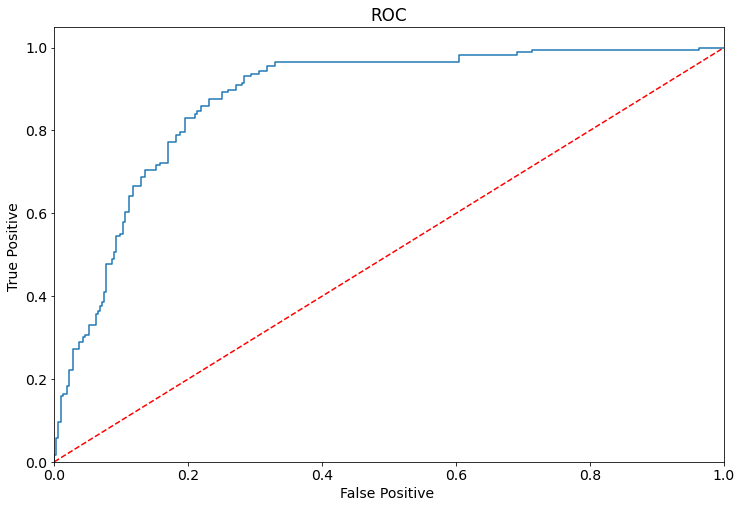

In [ ]:
logit_roc_auc = roc_auc_score(y_test, log_model.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, log_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive ')
plt.ylabel('True Positive ')
plt.title('ROC')
plt.show()

In [ ]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred)))

Accuracy: 0.81
Precision: 0.75
Recall: 0.66
F1: 0.71


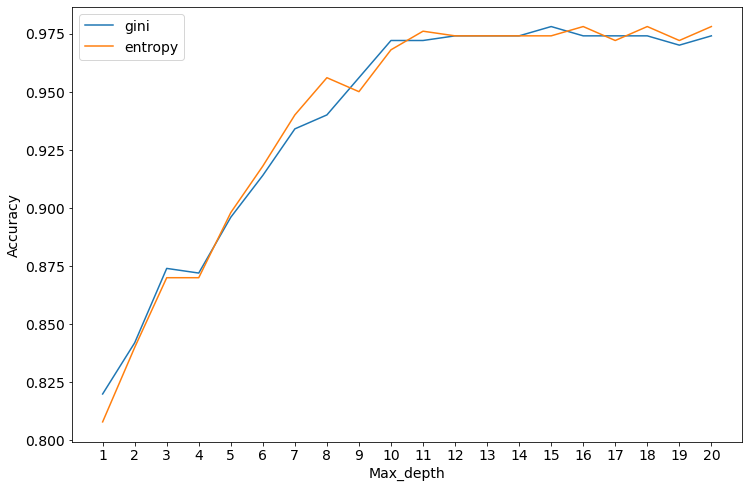

In [ ]:
from sklearn.metrics import accuracy_score

max_depth = []
acc_gini = []
acc_entropy = []

for i in range(1,21):
    dtree = DecisionTreeClassifier(criterion = "gini", max_depth = i)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    acc_gini.append(accuracy_score(y_test, pred))

    dtree = DecisionTreeClassifier(criterion = "entropy", max_depth = i)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    acc_entropy.append(accuracy_score(y_test, pred))
    max_depth.append(i)

d = pd.DataFrame({"acc_gini" : pd.Series(acc_gini),
                  "acc_entropy" : pd.Series(acc_entropy),
                  "max_depth" : pd.Series(max_depth)})

plt.plot("max_depth", "acc_gini", data = d, label = "gini")
plt.plot("max_depth", "acc_entropy", data = d, label = "entropy")
plt.xlabel("Max_depth")
plt.ylabel("Accuracy")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.legend()
plt.show()

## **Naive** **Bayes**


-	Gaussian Naive Bayes classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB


nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB()

In [ ]:
y_pred = nb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.822

In [ ]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.804

In [ ]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred)))

Accuracy: 0.82
Precision: 0.75
Recall: 0.73
F1: 0.74


**-	Multinomial Naive Bayes classifier**

In [ ]:
from sklearn.naive_bayes import MultinomialNB


nb = MultinomialNB()
nb_model = nb.fit(X_train, y_train)
nb_model

MultinomialNB()

In [ ]:
y_pred = nb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.78

In [ ]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.776

In [ ]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred)))

Accuracy: 0.78
Precision: 0.66
Recall: 0.77
F1: 0.71


-	Bernoulli Naive Bayes classifier

In [ ]:
from sklearn.naive_bayes import BernoulliNB


nb = BernoulliNB()
nb_model = nb.fit(X_train, y_train)
nb_model

BernoulliNB()

In [ ]:
y_pred = nb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.648

In [ ]:
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.5f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.5f}'.format(recall_score(y_test, y_pred)))
print('F1: {:.5f}'.format(f1_score(y_test, y_pred)))

Accuracy: 0.64800
Precision: 0.00000
Recall: 0.00000
F1: 0.00000


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Decision Tree**

In [ ]:
classifier = DecisionTreeClassifier(criterion = "entropy", max_depth = 12)
classifier.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=12)

In [ ]:
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.974

In [ ]:
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.5f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.5f}'.format(recall_score(y_test, y_pred)))
print('F1: {:.5f}'.format(f1_score(y_test, y_pred)))

Accuracy: 0.97800
Precision: 0.96089
Recall: 0.97727
F1: 0.96901


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


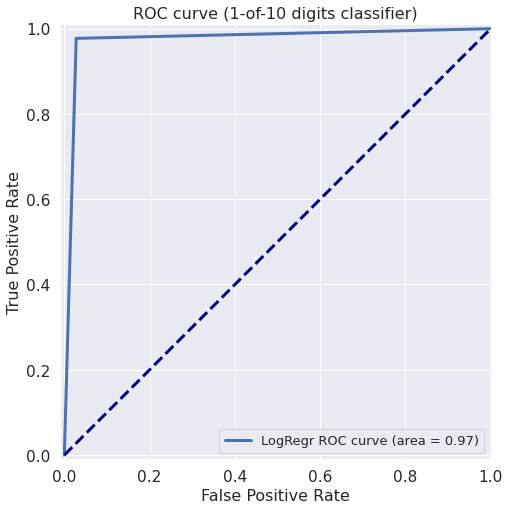

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()